In [2]:
import numpy as np 
import pymultinest as pmn
import bagpipes as pipes
from astropy.table import Table
from astropy.io import ascii, fits
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
import matplotlib

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=20), plt.rc('ytick', labelsize=20)
plt.rcParams['savefig.dpi'] = 300
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

### prepare the central galaxy catalog 
for completeness vs. radius estimation

upload to Graham 

In [3]:
import os

In [6]:
sat_dir = 'clauds_cat_v2020/total_sample_v2cat_masscut_1025/'
os.system('mkdir '+sat_dir+'central_cats/')
for cat_name in ['COSMOS_deep', 'ELAIS_deep', 'XMM-LSS_deep', 'DEEP_deep']:
    for z in [0.4, 0.6, 0.8]:
        central_dir = cat_name +'_'+str(z*10)+'/'
        cat_central = Table.read(sat_dir + central_dir + 'isolated_'+cat_name+
                                 '_11.15_'+str(z)+'_massive_normal_params_new.positions.fits')
        
        print(cat_name,z,len(cat_central))
        cat_central.write(sat_dir+'central_cats/''central_'+cat_name+'_'+str(z)+'.fits', overwrite=True)

COSMOS_deep 0.4 193
COSMOS_deep 0.6 198
COSMOS_deep 0.8 430
ELAIS_deep 0.4 236
ELAIS_deep 0.6 186
ELAIS_deep 0.8 518
XMM-LSS_deep 0.4 147
XMM-LSS_deep 0.6 204
XMM-LSS_deep 0.8 364
DEEP_deep 0.4 251
DEEP_deep 0.6 190
DEEP_deep 0.8 464


### completeness vs radius

In [150]:
curves_r = np.genfromtxt('completeness_curve_v2/curves/comp_bootstrap_all_all_8.5_9.5_0.5_0.7.txt')
comp_all = np.median(curves_r, axis=0)
comp_all_l = np.percentile(curves_r,16, axis=0)
comp_all_h = np.percentile(curves_r,84, axis=0)

Text(0, 0.5, 'completeness')

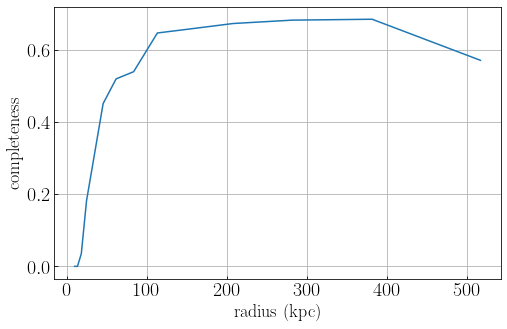

In [151]:
bin_number=14
bin_edges = 10 ** np.linspace(1.0, np.log10(700), num=bin_number + 1)

plt.figure(figsize = (8, 5))
plt.plot(bin_edges[:-1],comp_all)
plt.grid()

plt.xlabel('radius (kpc)',fontsize=18)
plt.ylabel('completeness',fontsize=18)

In [ ]:
# the complete curves plot

### completeness vs mass
in different redshift bins

In [9]:
from scipy.optimize import curve_fit

In [79]:
def sigmoid(x,a,b):
    return 1/(1+np.exp(-x/a+b))

In [54]:
np.isnan(1)

False

/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median for 3 results
  r = func(a, **kwargs)
/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median for 1 results
  r = func(a, **kwargs)
/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median for 4 results
  r = func(a, **kwargs)
/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median for 5 results
  r = func(a, **kwargs)
/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in medi

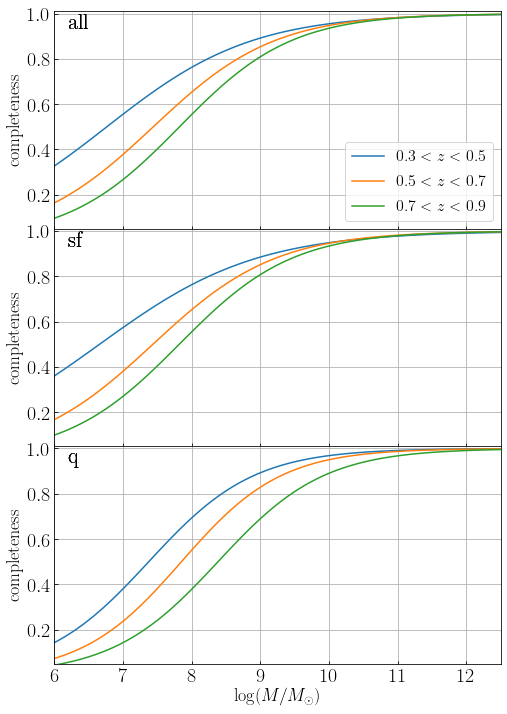

In [87]:
bin_edges = np.linspace(7, 13, num=25)
bin_centers = np.diff(bin_edges) + bin_edges[:-1]
fig, axs = plt.subplots(3, 1, figsize=(8,12),sharex=True, sharey=True)

for i,sfq in enumerate(['all','sf','q']):
    for z in [0.4, 0.6, 0.8]:
        curves_mass = np.genfromtxt('completeness_curve_mag/curves/comp_bootstrap_mass_'+sfq+'_'+str(round(z-0.1,1))+'_'+
                                str(round(z+0.1,1))+'.txt')

        comp_all = np.median(curves_mass, axis=0)
        comp_all_l = np.percentile(curves_mass,16, axis=0)    
        comp_all_h = np.percentile(curves_mass,84, axis=0)
        
        if sfq == 'q':
            for j in range(len(comp_all)):
                if j<len(comp_all)/2 and np.isnan(comp_all[j]):
                    comp_all[j]=0
                elif j>len(comp_all)/2 and np.isnan(comp_all[j]):
                    comp_all[j]=1
        else:
            comp_all[np.isnan(comp_all)]=1
        
        # fitting (modified) sigmoid function to the curves
        if sfq == 'q':
            popt, pcov = curve_fit(sigmoid, bin_centers[5:-7], comp_all[5:-7])
        else:
            popt, pcov = curve_fit(sigmoid, bin_centers[1:-7], comp_all[1:-7])
        x_plot = np.linspace(6,13,100)
        y_plot = sigmoid(x_plot,popt[0],popt[1])
        axs[i].plot(x_plot,y_plot,label=r'$'+str(round(z-0.1,1))+'<z<'+str(round(z+0.1,1))+'$')

#         axs[i].errorbar(bin_centers,comp_all,label=r'$z =$  '+str(round(z,1)),yerr=[comp_all-comp_all_l,comp_all_h-comp_all],fmt='-')
    
        axs[i].grid()
        axs[i].annotate(sfq,xy=([0.03,0.92]),xycoords='axes fraction',fontsize=22)
        axs[i].set_ylabel('completeness',fontsize=18)
        axs[0].legend(fontsize=16)
        axs[i].set_xlim([6,12.5])
        
plt.ylim([0.05,1.01])
plt.xlabel(r'$\log(M/M_\odot)$',fontsize=18)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.savefig('/Users/lejay/Desktop/completeness.pdf')

### completeness vs i-band magnitude

In [154]:
curves_mass = np.genfromtxt('completeness_curve_mag/curves/comp_bootstrap_mag.txt')
comp_all = np.median(curves_mass, axis=0)
comp_all_l = np.percentile(curves_mass,16, axis=0)
comp_all_h = np.percentile(curves_mass,84, axis=0)

Text(0, 0.5, 'completeness')

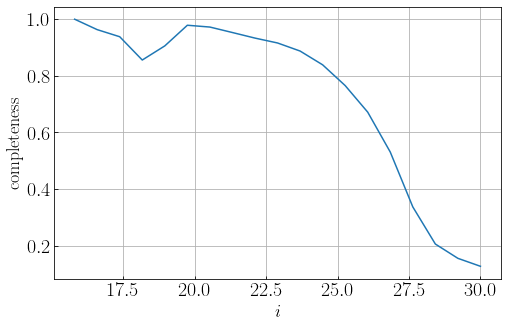

In [155]:
bin_edges = np.linspace(15, 30, num=20)
bin_centers = np.diff(bin_edges) + bin_edges[:-1]

plt.figure(figsize = (8, 5))
plt.plot(bin_centers,comp_all)
plt.grid()

plt.xlabel(r'$i$',fontsize=18)
plt.ylabel('completeness',fontsize=18)

### Mock Galaxy Catalog Mass/redshift distribution

In [405]:
mock_cat = Table.read('completeness_curve_mag/Output_cats/matched_cat_stack_COSMOS_deep_gal_cut_params.fits')

original_cat = Table.read('clauds_cat_v2020/COSMOS_deep_v2_v200930.fits')
original_cat = original_cat[original_cat['MASK']==0]
original_cat = original_cat[original_cat['inside_u'] == True]
original_cat = original_cat[~np.isnan(original_cat['Z_BEST'])]
original_cat = original_cat[original_cat['OBJ_TYPE'] == 0]

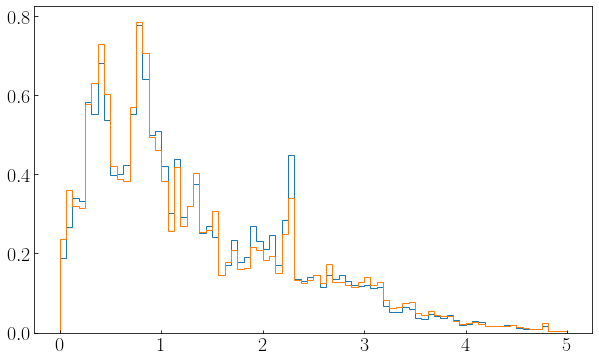

In [403]:
fig = plt.figure(figsize=(10,6))

plt.hist(mock_cat['Z_BEST'],bins=80, range=[0,5],histtype='step',density=True)
plt.hist(original_cat['Z_BEST'],bins=80, range=[0,5],histtype='step',density=True)
plt.show()

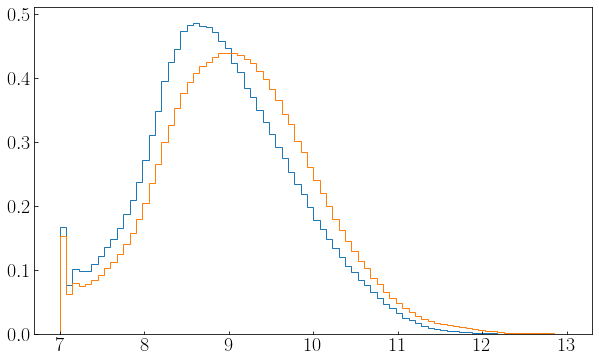

In [404]:
fig = plt.figure(figsize=(10,6))

plt.hist(mock_cat['MASS_MED'],bins=80, range=[7,13],histtype='step',density=True)
plt.hist(original_cat['MASS_MED'],bins=80, range=[7,13],histtype='step',density=True)
plt.show()

### Example Visual Check

In [66]:
import aplpy
from astropy.io import fits
from astropy.wcs import WCS

/Users/lejay/anaconda3/lib/python3.6/site-packages/aplpy/core.py:14: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  import mpl_toolkits.axes_grid.parasite_axes as mpltk


In [70]:
rand1_cutout = fits.open('/Users/lejay/Desktop/9571_46_1/cutout_9571_46_1.fits')
rand2_cutout = fits.open('/Users/lejay/Desktop/9571_46_1/cutout_9571_46_1_9_rand.fits')

In [103]:
rand1_wcs = WCS(rand1_cutout[0])
rand2_wcs = WCS(rand2_cutout[0])

rand1_center = rand1_wcs.all_pix2world(rand1_wcs.pixel_shape[0]/2,rand1_wcs.pixel_shape[1]/2,0)
rand2_center = rand2_wcs.all_pix2world(rand2_wcs.pixel_shape[0]/2,rand2_wcs.pixel_shape[1]/2,0)

rand1_corner1 = rand1_wcs.all_pix2world(rand1_wcs.pixel_shape[0],rand1_wcs.pixel_shape[1],0)
rand1_corner2 = rand1_wcs.all_pix2world(0,0,0)

width = abs(rand1_corner1[0] - rand1_corner2[0])

In [104]:
print(rand1_center)
print(rand2_center)

[array(151.097), array(1.168)]
[array(151.11), array(1.076)]


INFO: Auto-setting vmax to  2.532e+02 [aplpy.core]


/Users/lejay/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/lejay/anaconda3/lib/python3.6/site-packages/aplpy/overlays.py:369: UserWarning: Text labels do not have attribute linestyle. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))
/Users/lejay/anaconda3/lib/python3.6/site-packages/aplpy/overlays.py:369: UserWarning: Text labels do not have attribute linewidth. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))


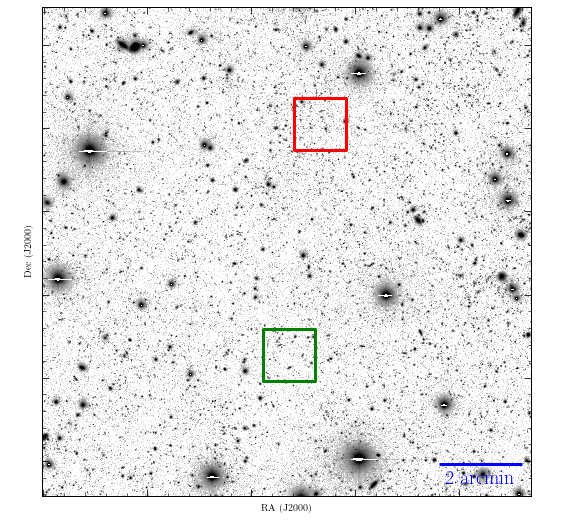

In [135]:
gc = aplpy.FITSFigure('/Users/lejay/Desktop/9571_46_1/calexp-9571-4-6.fits')
gc.show_grayscale(stretch='log',vmin=1)

gc.show_rectangles(rand1_center[0], rand1_center[1], [width], [width],linewidth=3,color='r')
gc.show_rectangles(rand2_center[0], rand2_center[1], [width], [width],linewidth=3,color='g')

gc.tick_labels.hide()

gc.add_scalebar(2./60)  # in degrees
gc.scalebar.set(linestyle='solid', color='blue', linewidth=3)
gc.scalebar.set_label('2 arcmin')
gc.scalebar.set_font(size=20)

gc.set_theme('publication')
gc.save('/Users/lejay/Desktop/9571_46_1/calexp-9571-4-6.png')

INFO: Auto-setting vmax to  2.017e+02 [aplpy.core]


/Users/lejay/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


INFO: Auto-setting vmax to  1.097e+02 [aplpy.core]


/Users/lejay/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


INFO: Auto-setting vmax to  1.086e+02 [aplpy.core]


INFO: Auto-setting vmax to  2.486e+02 [aplpy.core]


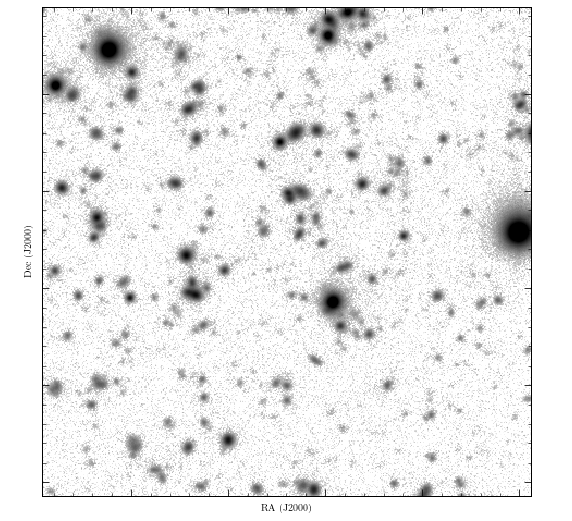

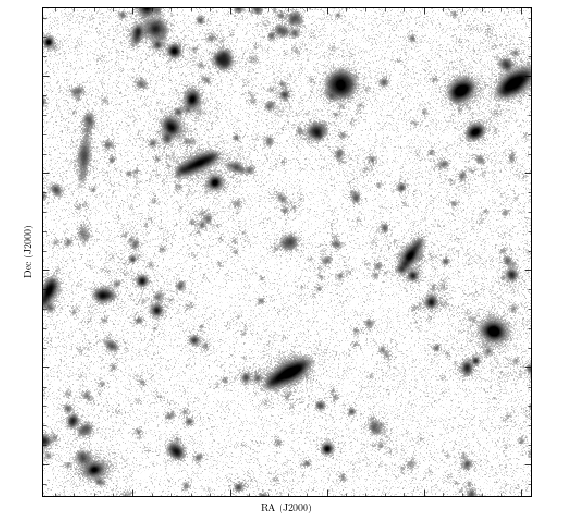

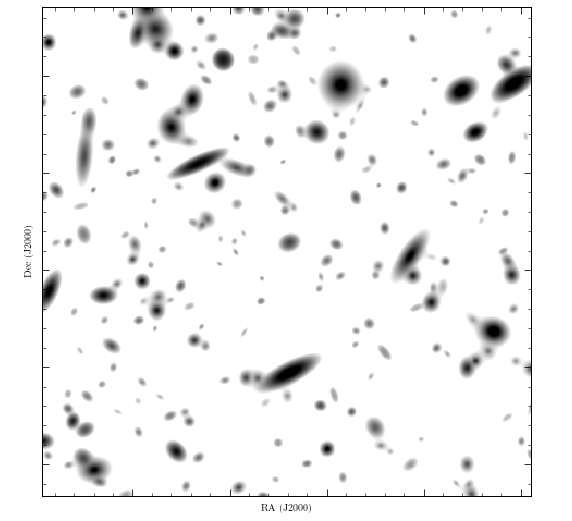

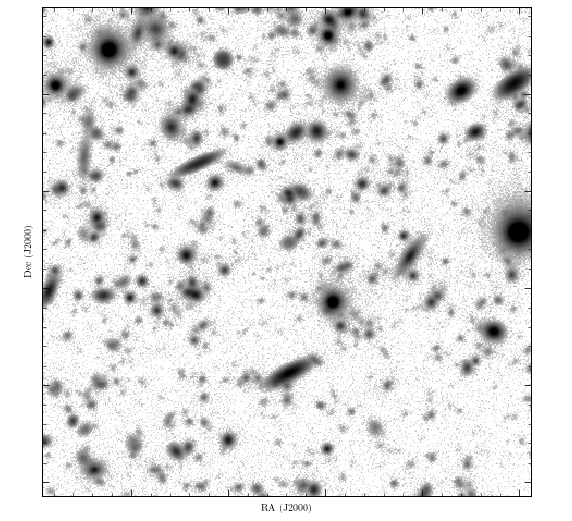

In [137]:
im_list = ['cutout_9571_46_1.fits',
           'cutout_9571_46_1_9_rand.fits',
           'cutout_9571_46_1_9_rand_models.fits',
           'cutout_9571_46_1_chi2_sum.fits']

for im in im_list:
    gc = aplpy.FITSFigure('/Users/lejay/Desktop/9571_46_1/'+im)
    gc.show_grayscale(stretch='log',vmin=1)
    gc.tick_labels.hide()
    gc.set_theme('publication')
    gc.save('/Users/lejay/Desktop/9571_46_1/'+im.replace('.fits','.png'))

mass/redshift distribution

In [401]:
cat_old = Table.read('CUT_deep_catalogs/completeness_useful_params/DEEP_deep_old_cat_gal_cut_params.fits')
cat_new = Table.read('clauds_cat_v2020/completeness_useful_params_cat/DEEP_deep_gal_cut_params.fits')

cat_mock_old = Table.read('completeness_curve_old_data/matched_olddata_cat_stack_DEEP_deep.fits')
cat_mock_new = Table.read('completeness_curve_old_data/matched_newdata_cat_stack_DEEP_deep.fits')

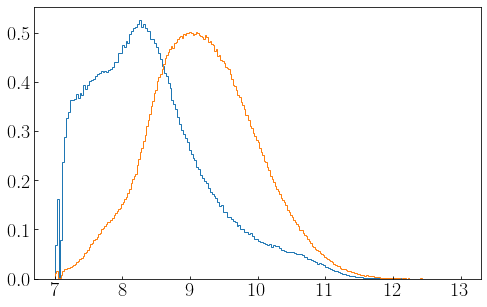

In [402]:
plt.figure(figsize = (8, 5))
plt.hist(cat_old['MASS_MED'],range=(7,13),bins='scott',histtype='step',density=True)
plt.hist(cat_new['MASS_MED'],range=(7,13),bins='scott',histtype='step',density=True)
plt.show()

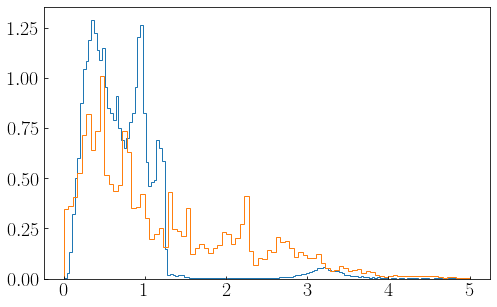

In [19]:
plt.figure(figsize = (8, 5))
plt.hist(cat_mock_old['zKDEPeak'],range=(0,5),bins='scott',histtype='step',density=True)
plt.hist(cat_mock_new['Z_BEST'],range=(0,5),bins='scott',histtype='step',density=True)
plt.show()

INFO: Auto-setting vmax to  1.359e+02 [aplpy.core]


/Users/lejay/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


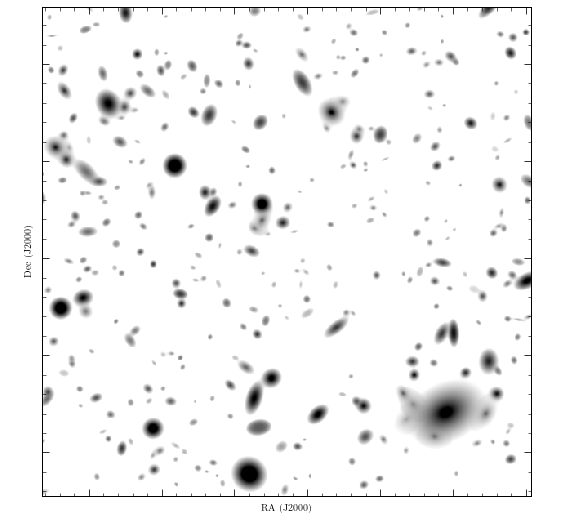

In [67]:
gc = aplpy.FITSFigure('completeness_curve_old_data/cutouts/9464_45_4newdata/cutout_9464_45_4_0_rand_models.fits')
gc.show_grayscale(stretch='log',vmin=1)
gc.tick_labels.hide()
gc.set_theme('publication')


### 10 patch small scale test
olddata/newdata on the same cutout positions

1. making region files of mock galaxies
2. comparing completeness curves
3. blahblah

In [7]:
import os
from regions import CircleSkyRegion
from regions import ds9_objects_to_string, read_ds9, write_ds9

In [305]:
# match the two mock catalogs (from old and new images)
data_type = 'newdata'

#######
old_data_type = 'olddata' # _t
cat_old = 'completeness_curve_old_data/matched_'+old_data_type+'_cat_stack_DEEP_deep.fits'
cat_new = 'completeness_curve_old_data/matched_newdata_cat_stack_DEEP_deep.fits'

if data_type == 'olddata':
    join = 'all2'  # all from cat_old
    combined_cat_name = 'completeness_curve_old_data/matched_'+old_data_type+'_newmatched_DEEP_deep.fits'
    physics_cat_name_other = 'clauds_cat_v2020/completeness_useful_params_cat/DEEP_deep_v6_gal_cut_params.fits' #new physcial catalog
    add_index = '_2'
elif data_type == 'newdata': 
    join = 'all1'  # all from cat_new
    combined_cat_name = 'completeness_curve_old_data/matched_newdata_oldmatched_DEEP_deep.fits'
    physics_cat_name_other = 'CUT_deep_catalogs/s16a_DEEP_deep_masterCat.fits'  # old physical catalog
    add_index = '_1'
else:
    print('wrong dta_type')
    
# matching with other
cmd = 'java -jar -Xms128m -Xmx256m stilts.jar tmatch2 in1='+cat_new + \
                ' in2='+cat_old+' find=best join='+join+' matcher=sky params=1.0 values1="RA_deShift DEC_deShift"' + \
                ' values2="RA_deShift DEC_deShift" out='+combined_cat_name
print(cmd)
print('')

# matching with other physical catalog (keeping all objects from combined catalog)
if data_type == 'olddata':
    cmd = 'java -jar stilts.jar tmatch2 in1='+ physics_cat_name_other+ \
                ' in2='+combined_cat_name+' find=best join=all2 matcher=sky params=1.0 values2="RA_deShift'+add_index+' DEC_deShift'+add_index+'"' + \
                ' values1="RA'+' DEC'+'" out='+combined_cat_name
else:
    cmd = 'java -jar stilts.jar tmatch2 in1='+combined_cat_name + \
                ' in2='+physics_cat_name_other+' find=best join=all1 matcher=sky params=1.0 values1="RA_deShift'+add_index+' DEC_deShift'+add_index+'"' + \
                ' values2="RA'+' DEC'+'" out='+combined_cat_name
print(cmd)


java -jar -Xms128m -Xmx256m stilts.jar tmatch2 in1=completeness_curve_old_data/matched_newdata_cat_stack_DEEP_deep.fits in2=completeness_curve_old_data/matched_olddata_cat_stack_DEEP_deep.fits find=best join=all1 matcher=sky params=1.0 values1="RA_deShift DEC_deShift" values2="RA_deShift DEC_deShift" out=completeness_curve_old_data/matched_newdata_oldmatched_DEEP_deep.fits

java -jar stilts.jar tmatch2 in1=completeness_curve_old_data/matched_newdata_oldmatched_DEEP_deep.fits in2=CUT_deep_catalogs/s16a_DEEP_deep_masterCat.fits find=best join=all1 matcher=sky params=1.0 values1="RA_deShift_1 DEC_deShift_1" values2="RA DEC" out=completeness_curve_old_data/matched_newdata_oldmatched_DEEP_deep.fits


In [306]:
# cleaning of the parameters (only keep useful ones)
# _1 from newdata/newcat and _2 from olddata/oldcat
print(data_type, combined_cat_name)
cat=Table.read(combined_cat_name)

if data_type == 'olddata':
    useful_params = ['Z_BEST_1','Z_ML_1''zKDEPeak','MASS_MED_1','MASS_MED_2','DEC_deShift_1','DEC_deShift_2',
                 'RA_deShift_1','RA_deShift_2','rand1_1', 'rand1_2','rand2_1','rand2_2',
                 'FLUX_AUTO_1.0_1','FLUX_AUTO_1.0_2','FLUX_APER_1.0_1','FLUX_APER_1.0_2',
                 'TRACT_1','TRACT_2','PATCH_1','PATCH_2','SSFR_MED_1','SSFR_MED_2','i']
    cat = cat[useful_params]
    cat.rename_column('Z_BEST_1','Z_BEST')
else:
    useful_params = ['Z_BEST','Z_ML','zKDEPeak_2','MASS_MED_1','MASS_MED_2','DEC_deShift_1','DEC_deShift_2',
                 'RA_deShift_1','RA_deShift_2','rand1_1', 'rand1_2','rand2_1','rand2_2',
                 'FLUX_AUTO_1.0_1','FLUX_AUTO_1.0_2','FLUX_APER_1.0_1','FLUX_APER_1.0_2',
                 'TRACT_1','TRACT_2','PATCH_1','PATCH_2','SSFR_MED_1','SSFR_MED_2','i']
    cat = cat[useful_params]
    cat.rename_column('zKDEPeak_2','zKDEPeak')
    
print(cat.info)
print(combined_cat_name)
cat.write(combined_cat_name, overwrite=True)

newdata completeness_curve_old_data/matched_newdata_oldmatched_DEEP_deep.fits
<Table masked=True length=231590>
      name       dtype  n_bad
--------------- ------- -----
         Z_BEST float64     0
           Z_ML float64     0
       zKDEPeak float64     0
     MASS_MED_1 float64     0
     MASS_MED_2 float64     0
  DEC_deShift_1 float64     0
  DEC_deShift_2 float64     0
   RA_deShift_1 float64     0
   RA_deShift_2 float64     0
        rand1_1 float64     0
        rand1_2 float64     0
        rand2_1 float64     0
        rand2_2 float64     0
FLUX_AUTO_1.0_1 float32     0
FLUX_AUTO_1.0_2 float32     0
FLUX_APER_1.0_1 float32     0
FLUX_APER_1.0_2 float32     0
        TRACT_1   int64 48037
        TRACT_2   int64 96025
        PATCH_1  bytes3     0
        PATCH_2  bytes3     0
     SSFR_MED_1 float64     0
     SSFR_MED_2 float64     0
              i float64     0

completeness_curve_old_data/matched_newdata_oldmatched_DEEP_deep.fits


In [261]:
# _1 from new, _2 from old

def stats_cutout(data_type, tract, patch, rand1_id, rand2_id):
    cat_patches = Table.read('CUT_deep_catalogs/tract_patches/DEEP_deep_patches.fits')
    
    # _1 from new, _2 from old
    if data_type == 'olddata':
        zkeyname = 'zKDEPeak'  
        add_index = '_2'
        add_index_other = '_1'
    elif data_type == 'olddata_t':
        zkeyname = 'Z_BEST_BC03'
        add_index = '_2'
        add_index_other = '_1'
    elif data_type == 'newdata': 
        zkeyname = 'Z_BEST'
        add_index = '_1'
        add_index_other = '_2'
    else:
        raise ValueError()
        
    if data_type == 'newdata':
        file = 'completeness_curve_old_data/matched_newdata_oldmatched_DEEP_deep.fits'
        mock_cat = Table.read(file)
    elif data_type == 'olddata': 
        file = 'completeness_curve_old_data/matched_olddata_newmatched_DEEP_deep.fits'
        mock_cat = Table.read(file)
    else:
        print('data type not valid')   
    # cutout cut
    tract_lim = cat_patches[cat_patches['tract']==str(tract)]
    patch_lim = tract_lim[tract_lim['patch']==patch[0]+patch[-1]]
    ra_min,ra_max = patch_lim['corner1'][0][0],patch_lim['corner0'][0][0]
    dec_min,dec_max = patch_lim['corner1'][0][1],patch_lim['corner2'][0][1]
#     print(ra_min, ra_max, dec_min, dec_max)
    
    # RA/DEC CUT (within the patch)
    mock_cat_cutout = mock_cat[mock_cat['DEC_deShift'+add_index]>dec_min]
    mock_cat_cutout = mock_cat_cutout[mock_cat_cutout['DEC_deShift'+add_index]<dec_max]
    mock_cat_cutout = mock_cat_cutout[mock_cat_cutout['RA_deShift'+add_index]>ra_min]
    mock_cat_cutout = mock_cat_cutout[mock_cat_cutout['RA_deShift'+add_index]<ra_max]
    
    
    # cutout cut
    mock_cat_cutout = mock_cat_cutout[mock_cat_cutout['rand1'+add_index]==rand1_id]
    mock_cat_cutout = mock_cat_cutout[mock_cat_cutout['rand2'+add_index]==rand2_id]
    
    
    # redetected / not redetected
    redetected = mock_cat_cutout['FLUX_AUTO_1.0'+add_index]>0
    matched_with_other = mock_cat_cutout['RA_deShift'+add_index_other]>-99.
    return mock_cat_cutout, redetected, matched_with_other
    

In [262]:
mock_cat_cutout, redetected, matched_with_other = stats_cutout('olddata', 9464, '4,3', 4, 0)
print(len(mock_cat_cutout),sum(redetected)/len(mock_cat_cutout), sum(matched_with_other))

mock_cat_cutout, redetected, matched_with_other = stats_cutout('newdata', 9464, '4,3', 4, 0)
print(len(mock_cat_cutout),sum(redetected)/len(mock_cat_cutout), sum(matched_with_other))

188 0.5106382978723404 155
198 0.5252525252525253 198


In [56]:
regions = []
data_type = 'newdata'
mock_cat, redetected, matched_with_other = stats_cutout(data_type, 9464, '4,5', 4, 0)

for i,gal in enumerate(mock_cat):
    
    if redetected[i]:
        color = 'green'
    else:
        color = 'red'
    
    if matched_with_other[i]:
        dash = 0
    else:
        dash = 5
    if data_type == 'newdata':   
        center = SkyCoord(gal['RA_deShift_1'],gal['DEC_deShift_1'],unit='deg')
    elif data_type == 'olddata':
        center = SkyCoord(gal['RA_deShift_2'],gal['DEC_deShift_2'],unit='deg')
        
    radius = Angle(1.5/3600, 'deg')
    region = CircleSkyRegion(center, radius,meta={'color': color,'dash':dash})
    regions.append(region)
    
write_ds9(regions, 'completeness_curve_old_data/9464_45_4_0_rand_models_'+data_type+'.reg')


In [310]:
# make completeness curve
rand1_id_list = np.arange(10)
rand2_id_list = np.arange(10)
data_type = 'olddata'
as_func_of = 'mass'
z_low=0.5
z_high=0.7
for tract in [9463,9464]:
    if tract == 9463:
        patches = ['33','34','35','44','45']
    else:
        patches = ['33','34','43','44','45']

    for patch in patches:

        if data_type=='olddata':
            matched = 'newmatched'
        elif data_type == 'olddata_t':
            matched = 'newmatched'
        else:
            matched = 'oldmatched'

        file = 'completeness_curve_old_data/matched_'+data_type+'_'+matched+'_DEEP_deep.fits'
        mock_cat = Table.read(file)
        print(tract, patch, data_type, file)

        detected_tot = np.zeros(10)
        all_obj_tot = np.zeros(10)
        for rand1_id in rand1_id_list:
            for rand2_id in rand2_id_list:

                # _1 from new, _2 from old
                if data_type == 'olddata':
                    zkeyname = 'zKDEPeak'  
                    add_index = '_2'
                    add_index_other = '_1'
                elif data_type == 'olddata_t':
                    zkeyname = 'Z_BEST_BC03'
                    add_index = '_2'
                    add_index_other = '_1'
                elif data_type == 'newdata': 
                    zkeyname = 'Z_ML'
                    add_index = '_1'
                    add_index_other = '_2'
                else:
                    raise ValueError()

                # cutout cut
                mock_cat_cutout, redetected, matched_with_other = stats_cutout(data_type, tract, patch, rand1_id, rand2_id)
                # matched cut (bewteen olddata and newdata derived mock gals)
                # mock_cat_z = mock_cat_z[mock_cat_z['RA_deShift'+add_index_other] > -99.]

                # binning
                if as_func_of == 'mass':
                    # redshift cut
                    mock_cat_z = mock_cat_cutout[mock_cat_cutout[zkeyname] > z_low]
                    mock_cat_z = mock_cat_z[mock_cat_z[zkeyname] < z_high]
                    
                    # mag cut
#                     mock_cat_z = mock_cat_z[mock_cat_z['i'] < 25]
                    
                    # mass cut
                    mock_cat_z = mock_cat_z[mock_cat_z['MASS_MED'+add_index] > 0]
                    
                    # select galaxies with consistent mass
#                     print(tract,patch,rand1_id,rand2_id,len(mock_cat_cutout))
#                     mock_cat_cutout = mock_cat_cutout[abs(mock_cat_cutout['MASS_MED_1']-mock_cat_cutout['MASS_MED_2'])<0.25]
#                     print(tract,patch,rand1_id,rand2_id,len(mock_cat_cutout))
                    
                    bin_number = 10
                    bin_edges = np.linspace(7, 12, num=bin_number+1)
                    mass_list = np.array(mock_cat_z['MASS_MED'+add_index])  # kpc

                    all_obj = np.histogram(mass_list, bins=bin_edges)[0]
                    cat_detected = mock_cat_z[~np.isnan(mock_cat_z['FLUX_APER_1.0'+add_index])]

                    mass_list_detected = np.array(cat_detected['MASS_MED'+add_index])  # kpc
                    detected = np.histogram(mass_list_detected, bins=bin_edges)[0]

                elif as_func_of == 'mag':
                    mock_cat_z = mock_cat_cutout[mock_cat_cutout[zkeyname] > 0.0]
                    mock_cat_z = mock_cat_cutout[mock_cat_cutout[zkeyname] < 99.0]

                    bin_number = 10
                    bin_edges = np.linspace(15, 28, num=bin_number+1)
                    mag_list = np.array(mock_cat_z['i'+add_index])  # kpc
                    mag_list = mag_list[~np.isnan(mag_list)]
                    mag_list = mag_list[~np.isinf(mag_list)]

                    all_obj = np.histogram(mag_list, bins=bin_edges)[0]
                    cat_detected = mock_cat_z[~np.isnan(mock_cat_z['FLUX_APER_1.0'+add_index])]

                    mag_list_detected = np.array(cat_detected['i'+add_index])  # kpc
                    mag_list_detected = mag_list_detected[~np.isnan(mag_list_detected)]

                    mag_list_detected = mag_list_detected[~np.isinf(mag_list_detected)]
                    detected = np.histogram(mag_list_detected, bins=bin_edges)[0]       

                # add up results from each cutout
                detected_tot += detected
                all_obj_tot += all_obj

        all_curve = detected_tot/all_obj_tot
        np.save('completeness_'+str(tract)+'_'+patch+'_'+data_type+'_'+as_func_of+'.npy',np.array(all_curve))


9463 33 olddata completeness_curve_old_data/matched_olddata_newmatched_DEEP_deep.fits


/Users/lejay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:103: RuntimeWarning: invalid value encountered in true_divide


9463 34 olddata completeness_curve_old_data/matched_olddata_newmatched_DEEP_deep.fits
9463 35 olddata completeness_curve_old_data/matched_olddata_newmatched_DEEP_deep.fits
9463 44 olddata completeness_curve_old_data/matched_olddata_newmatched_DEEP_deep.fits
9463 45 olddata completeness_curve_old_data/matched_olddata_newmatched_DEEP_deep.fits
9464 33 olddata completeness_curve_old_data/matched_olddata_newmatched_DEEP_deep.fits
9464 34 olddata completeness_curve_old_data/matched_olddata_newmatched_DEEP_deep.fits
9464 43 olddata completeness_curve_old_data/matched_olddata_newmatched_DEEP_deep.fits
9464 44 olddata completeness_curve_old_data/matched_olddata_newmatched_DEEP_deep.fits
9464 45 olddata completeness_curve_old_data/matched_olddata_newmatched_DEEP_deep.fits


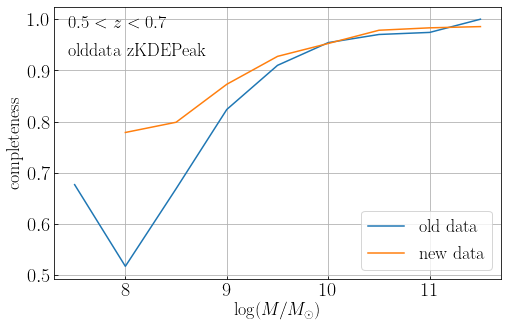

In [311]:
as_func_of = 'mass'
if as_func_of == 'mass':
    np.linspace(7, 12, num=11)
else:
    np.linspace(15, 28, num=11)
    
bin_centers = np.diff(bin_edges) + bin_edges[:-1]
tract = 9464
patch = '4,5'

comp_old_all = 0
comp_new_all = 0

for tract in [9463,9464]:
        if tract == 9463:
            patches = ['33','34','35','44','45']
        else:
            patches = ['33','34','43','44','45']
    
        for patch in patches:
            
            comp_old =  np.load('completeness_'+str(tract)+'_'+patch+'_olddata_'+as_func_of+'.npy')
            # comp_old_t =  np.load('completeness_'+str(tract)+'_'+patch+'_olddata_t_'+as_func_of+'.npy')
            comp_new =  np.load('completeness_'+str(tract)+'_'+patch+'_newdata_'+as_func_of+'.npy')
            
            if isinstance(comp_old_all,int):
                comp_old_all = comp_old
                comp_new_all = comp_new
            else:
                comp_old_all = np.vstack([comp_old_all,comp_old])
                comp_new_all = np.vstack([comp_new_all,comp_new])


plt.figure(figsize = (8, 5))
plt.plot(bin_centers, np.mean(comp_old_all,axis=0), label='old data')
# plt.plot(bin_centers, comp_old_t, label='old data T')
plt.plot(bin_centers, np.mean(comp_new_all,axis=0), label='new data')
plt.grid()

if as_func_of == 'mass':
    plt.xlabel(r'$\log(M/M_\odot)$',fontsize=18)
    plt.annotate(r'$'+str(z_low)+'<z<'+str(z_high)+'$',xy=([0.03,0.92]),xycoords='axes fraction',fontsize=18)
else:
    plt.xlabel(r'$i$',fontsize=18)
    
plt.annotate(data_type+' '+zkeyname.replace('_','\_'),xy=([0.03,0.82]),xycoords='axes fraction',fontsize=18)
plt.legend(fontsize=18, loc='lower right')
plt.ylabel('completeness',fontsize=18)
plt.show()

comparing masses for galaxies both detected in old and new images.

(overlapping cutouts)

1. detected in old image
2. detected in new image
3. included in old physical catalog
4. included in old physical catalog

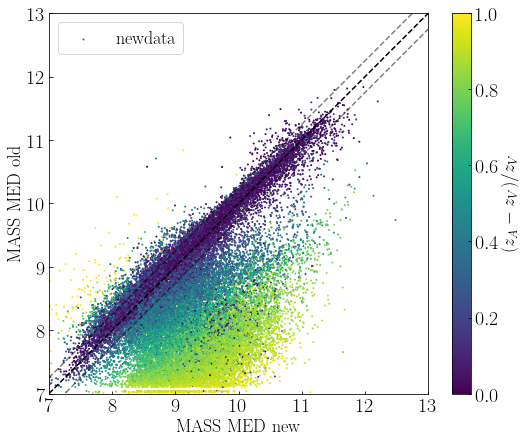

In [313]:
# mass comparisons for gals
data_type = 'newdata'

if data_type == 'newdata':
    file = 'completeness_curve_old_data/matched_newdata_oldmatched_DEEP_deep.fits'
    mock_cat = Table.read(file)
    add_index = '_1'
elif data_type == 'olddata': 
    file = 'completeness_curve_old_data/matched_olddata_newmatched_DEEP_deep.fits'
    mock_cat = Table.read(file)
    add_index = '_2'
else:
    print('data type not valid')   

# select galaxies
# _1 from newdata/newcat and _2 from olddata/oldcat
mock_cat = mock_cat[mock_cat['FLUX_AUTO_1.0'+add_index]>0]  # redetected
mock_cat = mock_cat[mock_cat['DEC_deShift'+add_index]>-99.]  # matched with other
mock_cat = mock_cat[mock_cat['MASS_MED_1']>0] # matched with v6 physical catalog
mock_cat = mock_cat[mock_cat['MASS_MED_2']>0] # matched with old physical catalog

#delta_z
# mock_cat = mock_cat[mock_cat['Z_BEST']>0.5]
# mock_cat = mock_cat[mock_cat['Z_BEST']<0.7]
delta_z = abs(mock_cat['zKDEPeak'] - mock_cat['Z_ML'])/mock_cat['Z_ML']

# one-to-one line
x = np.linspace(7,13,100)
y1 = x
y2 = x+0.25
y3 = x-0.25

plt.figure(figsize = (8.5, 7))
plt.scatter(mock_cat['MASS_MED_1'], mock_cat['MASS_MED_2'], label=data_type,s=1,c=delta_z,vmin=0,vmax=1)
plt.plot(x,y1,'k--')
plt.plot(x,y2,'k--',alpha=0.5)
plt.plot(x,y3,'k--',alpha=0.5)
plt.xlabel('MASS MED new',fontsize=18)
plt.ylabel('MASS MED old',fontsize=18)
plt.legend(fontsize=18)
cbar = plt.colorbar()
cbar.set_label(r'$(z_A-z_V)/z_V$',fontsize=18)
plt.xlim([7,13])
plt.ylim([7,13])
plt.show()

### direct comparison of SNR(chi2) / model images

In [138]:
# img_old = fits.open('/Users/lejay/Desktop/9571_46_1/chi2_9571_46.fits')
# img_new = fits.open('/Users/lejay/Desktop/9571_46_1/calexp-9571-4-6.fits')

img_old = fits.open('completeness_curve_old_data/cutouts/9464_45_4olddata/cutout_9464_45_4_0_rand_models.fits')
img_new = fits.open('completeness_curve_old_data/cutouts/9464_45_4newdata/cutout_9464_45_4_0_rand_models.fits')


In [365]:
im = fits.open('/Users/lejay/Desktop/9571_46_1/cutout_9571_46_1_6_rand_models.fits')

INFO: Auto-setting vmax to  7.047e+02 [aplpy.core]


/Users/lejay/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


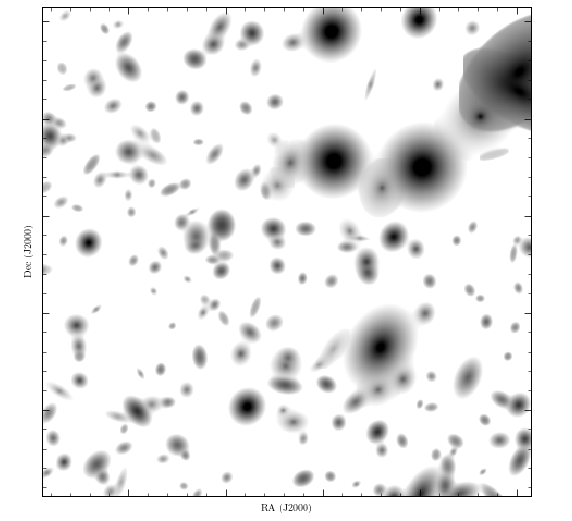

In [367]:
fig = aplpy.FITSFigure('/Users/lejay/Desktop/9571_46_1/cutout_9571_46_1_6_rand_models.fits')
fig.show_grayscale(stretch='log',vmin=0.3)
fig.tick_labels.hide() 
fig.set_theme('publication')

In [10]:
from astropy.table import Table
import astropy.units as u
from cut_img import *
from astropy import wcs
from astropy.coordinates import SkyCoord, Angle, match_coordinates_sky

In [143]:
cat = Table.read('clauds_cat_v2020/COSMOS_test.fits')
coords = SkyCoord(cat['RA']*u.deg,cat['DEC']*u.deg)
idx, sep2d, dist3d = match_coordinates_sky(SkyCoord(151.052131, 1.197225, unit="deg"), coords, nthneighbor=1)

In [385]:
w=wcs.WCS(im[0].header)
x,y = w.wcs_world2pix(151.052131, 1.197225, 0)

cutout_path = '/Users/lejay/Desktop/9571_46_1/'
cutoutimg(im, x, y, xw=21, yw=21, units='pixels',
                          outfile=cutout_path+'cutout_model_one_gal2.fits')

INFO: Auto-setting vmax to  2.897e+01 [aplpy.core]


/Users/lejay/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


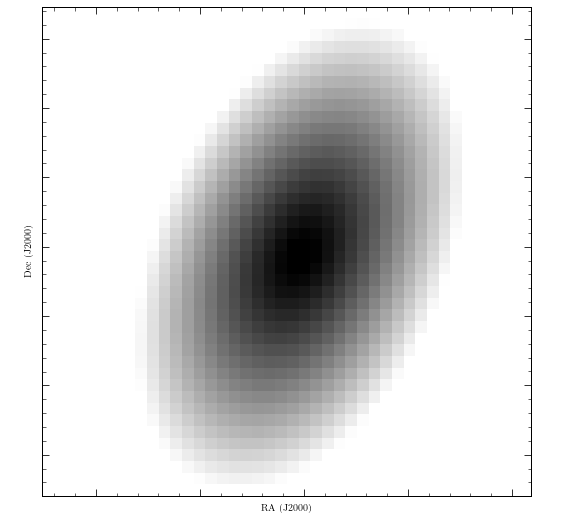

In [386]:
fig = aplpy.FITSFigure('/Users/lejay/Desktop/9571_46_1/cutout_model_one_gal2.fits')
fig.show_grayscale(stretch='log',vmin=0.3)
fig.tick_labels.hide()
fig.set_theme('publication')
fig.save('/Users/lejay/Desktop/9571_46_1/cutout_model_one_gal2.png')

In [34]:
from astropy.table import vstack
import matplotlib as mpl

In [229]:
for k in [1,2,3,4,7,9,10,11,12,13]:
    for i in range(10):
        if i==0:
            cat_stack = Table.read('/Users/lejay/Desktop/9571_46_1/model_completeness_gal_'+str(k)+'_rand_'+str(i)+'.fits')
        else:
            cat = Table.read('/Users/lejay/Desktop/9571_46_1/model_completeness_gal_'+str(k)+'_rand_'+str(i)+'.fits')
            cat_stack = vstack([cat_stack,cat])

    cat_stack.write('/Users/lejay/Desktop/9571_46_1/model_completeness_gal_'+str(k)+'.fits',overwrite=True)
    

In [145]:
# load data catalog (DEEP_deep)
cat = Table.read('clauds_cat_v2020/DEEP_deep_v2_v200930.fits')

In [228]:
# selection of insert positions

pos = np.array([])
for i in range(20):
    # load cutout image (data iamges for inserting models to)
    im = fits.open('/Users/lejay/Desktop/9571_46_1/cutout_9571_46_1_'+str(i)+'_rand.fits')
    w = wcs.WCS(im[0].header)
    y_shape, x_shape = im[0].shape[0], im[0].shape[1]
    print(x_shape, y_shape)
    
    ra_max, dec_min = w.wcs_pix2world(0, 0, 0)
    ra_min, dec_max = w.wcs_pix2world(x_shape, y_shape, 0)
    
    cutout_size = 45
    plate_scale = 4.66666666666396e-5 
    edge_size = cutout_size * plate_scale # in degrees
    ra_min += edge_size
    ra_max -= edge_size
    dec_min += edge_size
    dec_max -= edge_size

    # cut data catalog
    cat_cut = cat[np.logical_and(cat['RA']>ra_min, cat['RA']<ra_max)]
    cat_cut = cat_cut[np.logical_and(cat_cut['DEC']>dec_min, cat_cut['DEC']<dec_max)]

    # find low-density region
    check_vincinity = False
    while not check_vincinity:
        ra_rand = ra_min + np.random.random()*(ra_max-ra_min)
        dec_rand = dec_min + np.random.random()*(dec_max-dec_min)
                     
        # cut data image
        check_size = 100 # size of subimage to check no bright object
        x_rand, y_rand = w.wcs_world2pix(ra_rand, dec_rand, 0)
        pixel_values_check = im[0].data[int(y_rand-check_size/2):int(y_rand+check_size/2), int(x_rand-check_size/2):int(x_rand+check_size/2)]
    
        cat_rand = cat_cut[np.logical_and(cat_cut['RA']>ra_rand-check_size/2*plate_scale, cat_cut['RA']<ra_rand+check_size/2*plate_scale)]
        cat_rand = cat_rand[np.logical_and(cat_rand['DEC']>dec_rand-check_size/2*plate_scale, cat_rand['DEC']<dec_rand+check_size/2*plate_scale)]
        
        if pixel_values_check.shape[0] == 0 or pixel_values_check.shape[1] == 0:
            continue
            
        if len(cat_rand)<5 and np.max(pixel_values_check)<30:
            check_vincinity = True
            
        else:
            check_vincinity = False
                     
    # record the insert position
    print(i,ra_rand, dec_rand, x_rand, y_rand, np.max(pixel_values_check))
    pos = np.append(pos,[x_rand, y_rand])
    
    # make a region file
    center = SkyCoord(ra_rand, dec_rand,unit='deg')
    radius = Angle(1.5/3600, 'deg')
    region = CircleSkyRegion(center, radius,meta={'color': 'green','dash':0})
    write_ds9([region], '/Users/lejay/Desktop/9571_46_1/cutout_9571_46_1_'+str(i)+'_rand.reg')

np.save('/Users/lejay/Desktop/9571_46_1/pos.npy', pos.reshape(20,2))

600 600
0 151.11058447107024 1.1103508781585825 197.50909417201504 87.9089470014842 28.048572063446045
600 600
1 151.11329923935097 1.1430371532354993 316.9551310198309 291.94224080397544 16.927730917930603
600 600
2 151.14260383403308 1.068675804193932 199.4756153483172 440.09589594727186 25.64036536216736
600 600
3 151.0516467628579 1.0888158491719928 503.0180426561715 539.2758262859834 27.77245259284973
600 600
4 151.0292979574482 1.179967978368434 360.3967808449156 301.889045250311 22.543993949890137
600 600
5 151.12422263127644 1.1473790536868294 325.02610081420823 269.7070847431696 13.931423425674438
600 600
6 151.07968716786783 1.0538639589728422 554.3454652065998 372.6823826145801 28.651854634284973
600 600
7 151.20111395744573 1.1318383467569244 111.11564806084994 70.23867104992314 23.502222061157227
600 600
8 151.0907112884981 1.190082149075545 63.45068472266172 484.0620371441437 26.108606815338135
600 600
9 151.1034705478011 1.0662031041983315 531.8513184202827 541.968179470

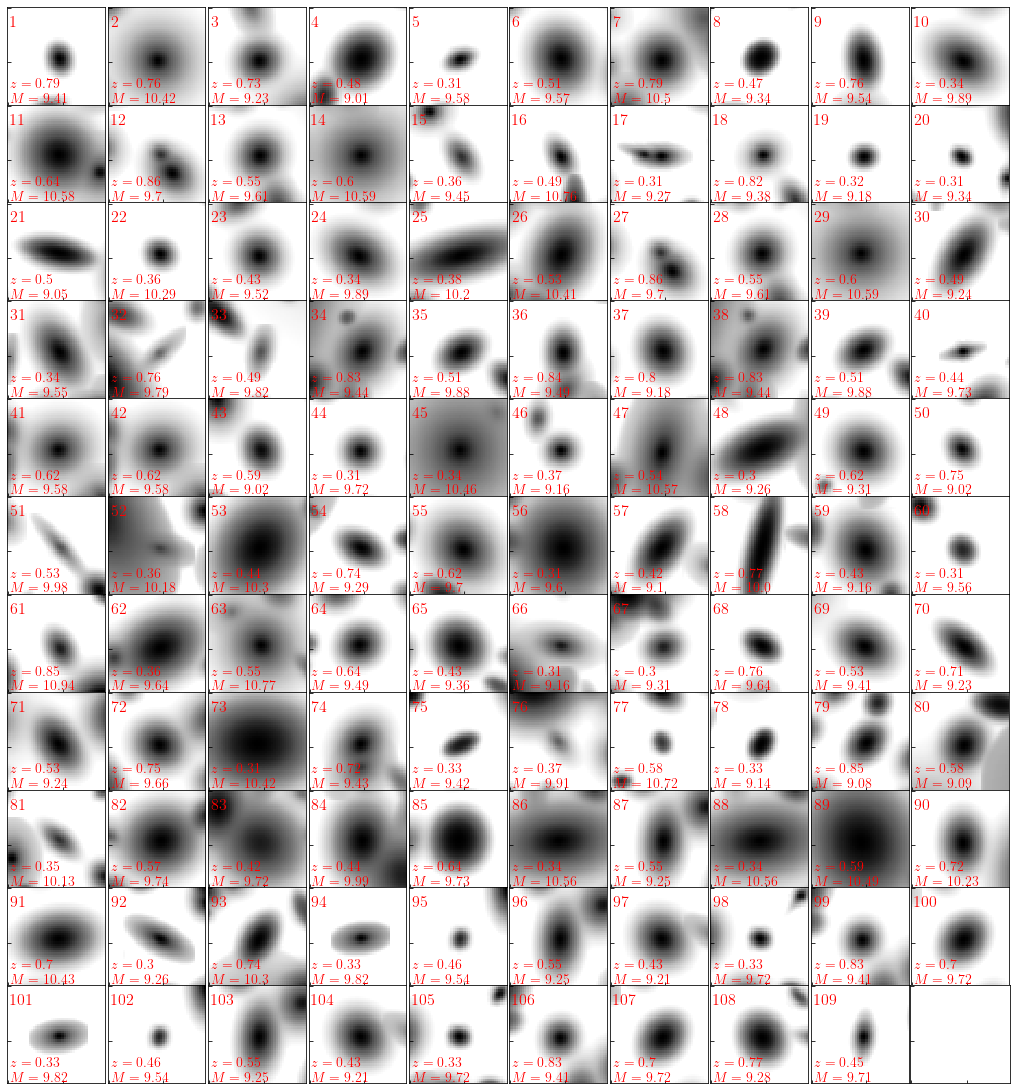

In [452]:
fig, axs = plt.subplots(11, 10, figsize=(10*1.8,11*1.8),sharex=True, sharey=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
cat_params = Table.read('/Users/lejay/Desktop/fscale_test/model_gals.fits')

for i in range(109):
    row = i // 10
    col = i % 10
    
    gal = cat_params[i]
    m=gal['MASS_MED']
    z=gal['Z_BEST']
    
    im = fits.open('/Users/lejay/Desktop/fscale_test/model_gal_cutouts/cutout_model_gal_'+str(i+1)+'.fits')[0].data
    axs[row][col].imshow(im, norm=mpl.colors.LogNorm(), cmap='Greys',vmin=0.01)
    axs[row][col].set_yticklabels([])
    axs[row][col].set_xticklabels([])
    axs[row][col].annotate(str(i+1),xy=([0.03,0.8]),xycoords='axes fraction',fontsize=16,color='r')
    axs[row][col].annotate(r'$M='+str(round(m,2))+'$',xy=([0.03,0.02]),xycoords='axes fraction',fontsize=14,color='r')
    axs[row][col].annotate(r'$z='+str(round(z,2))+'$',xy=([0.03,0.17]),xycoords='axes fraction',fontsize=14,color='r')
    

In [470]:
pos = np.load('/Users/lejay/Desktop/fscale_test/pos.npy')
print(pos[0])

[197.509  87.909]


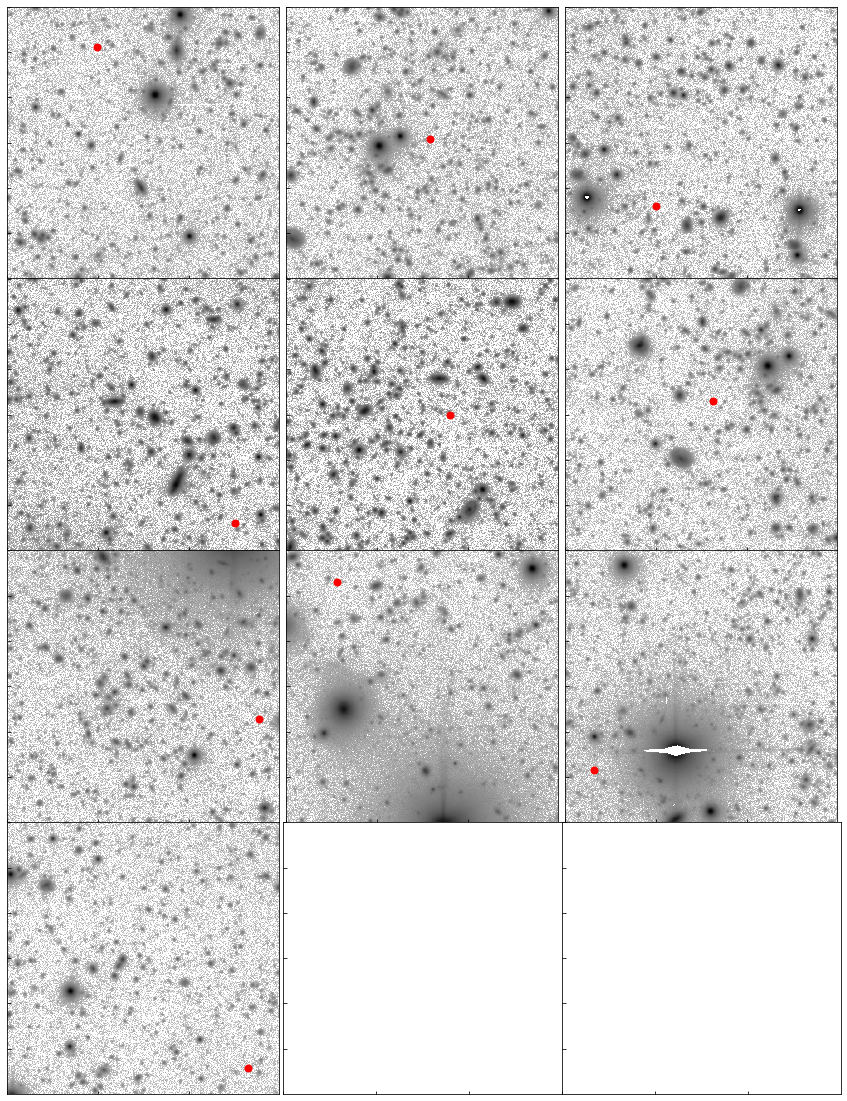

In [474]:
fig, axs = plt.subplots(4, 3, figsize=(6*2.5,8*2.5),sharex=True, sharey=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

pos = np.load('/Users/lejay/Desktop/fscale_test/pos.npy')

for i in range(10):
    row = i // 3
    col = i % 3
    
    im_cutout = fits.open('/Users/lejay/Desktop/fscale_test/cutout_9571_46_1_'+str(i)+'_rand.fits')[0].data
    axs[row][col].imshow(im_cutout, norm=mpl.colors.LogNorm(), cmap='Greys',vmin=0.01)
    axs[row][col].set_yticklabels([])
    axs[row][col].set_xticklabels([])
    
    axs[row][col].scatter(pos[i][0],pos[i][1],linewidth=2,color='r')

In [532]:
# match model_gasl.fits with physical catalog (again)
cat_model_gals_name = '/Users/lejay/Desktop/fscale_test/model_gals.fits'
cat_phys_name = 'clauds_cat_v2020/DEEP_deep_v2_v200930.fits'
cat_model_gals_phys_matched_name = '/Users/lejay/Desktop/fscale_test/model_gals_expand.fits'

cmd = 'java -jar -Xms128m -Xmx256m stilts.jar tmatch2 progress=none in1='+cat_model_gals_name + \
                ' in2='+cat_phys_name+' find=best join=all1 matcher=sky params=1.0 values1="RA DEC"' + \
                ' values2="RA'+' DEC'+'" out='+cat_model_gals_phys_matched_name
os.system(cmd)

# check mathcing is fine
cat_model_gals_phys_matched = Table.read(cat_model_gals_phys_matched_name)

# get r,i,z mags and ssfr
useful_params = ['ID_1','RA_1','DEC_1','MASS_MED_1','Z_BEST_1','r','i_1','SSFR_MED']
new_names = ['ID','RA','DEC','MASS_MED','Z_BEST','r','i','SSFR_MED']
cat_model_gals_phys_matched = cat_model_gals_phys_matched[useful_params]

# resolve colname conflicts
cat_model_gals_phys_matched.rename_columns(useful_params, new_names)
cat_model_gals_phys_matched.write(cat_model_gals_phys_matched_name, overwrite=True)
print(cat_model_gals_phys_matched.info)

<Table masked=True length=623>
  name    dtype 
-------- -------
      ID   int32
      RA float64
     DEC float64
MASS_MED float64
  Z_BEST float64
       r float64
       i float64
SSFR_MED float64



0 0 [ 2  4  8  9 16 19 22  1  2  5  6 10 15 20 22 23 25 26 28 31 35 36 37 40
  1  2  9 12 14 15 20 21 26  2 10 11 15 16 18 20 24 25 26  2  3  4  7 10
 14 15 18 20 25 27 29 30 33 34 35 40 41 43  5 13 16 17 20 22 25  7 11 13
 15 18 21 23 25 26 29 32 33  3  4  6  7  8 14 15 17 18 22 24 25 26 27 30
 31 33 35 37 38 39 40 42 45 46  3  6  7 12 14 15 18 19 20 21  3  6 11 12
 13 16 18 19 20 22 23 25  1  2  4 10 12 13 15 18 19 20  4  5  7 10 12 13
 21 23 24 26 27 30 31 33 34 38 48 52 54 56 61 63  5  8  9 17 19 22 23 27
 31 34 35 40 45 46  4  7 14 15 16 17 21 22 24 28 31 32 33 36  2  5  6  7
 14 15 17  1  2  9 11 12 14 21 24 25 26 28 32 34  1  2  3  5  7  8 11 12
  3  4  8 10  3  7  8 10 14 17 19  3  5  7  9 10 11 16 19 21 24]
0 1 [ 1  6  7 10 14 15 20 21  3  9 24 27 29 32 33 38 39  4  6 18 22 23  5  6
  7  8 21  5 16 23 31 38  3  6  7 19 29  2  6  8  9 10 16 27 28 30  1  2
 32  8 11 16 17 24  1  2 15 24  6  7 17 22 24  9 11 14 16 25 29 32 36 58
  1  3 14 18 29 36 38  2  3 13 19 29 37 40  3 12 13

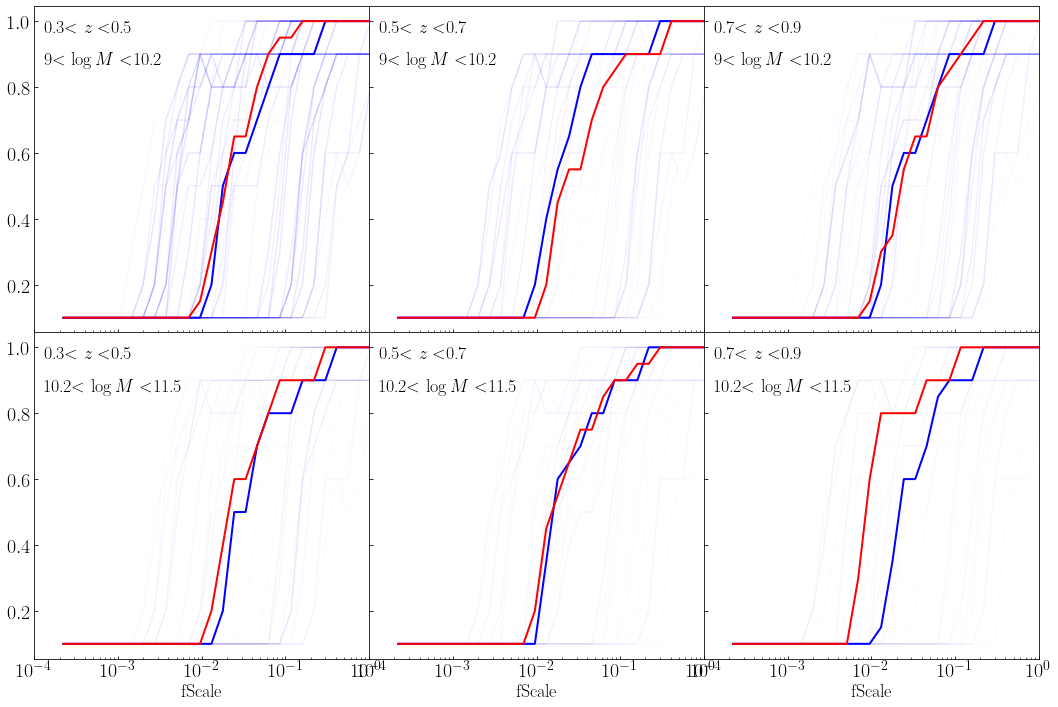

In [535]:
fig, axs = plt.subplots(2, 3, figsize=(18,12),sharex=True, sharey=True)
cat_params = Table.read('/Users/lejay/Desktop/fscale_test/model_gals_expand.fits')

zs = [0.4, 0.6, 0.8]
mass_limits = [9,10.2,11.5]
k=0
alpha_each = 0.01

for i in range(6):
    row = i // 3
    col = i % 3
    z = zs[col]
    
    cat_params_z = cat_params[abs(cat_params['Z_BEST']-z)<0.1]
    cat_params_z = cat_params_z[cat_params_z['MASS_MED']>mass_limits[row]]
    cat_params_z = cat_params_z[cat_params_z['MASS_MED']<mass_limits[row+1]]
    
    detected_rate_panel_q = []
    detected_rate_panel_sf = []
    for gal in cat_params_z:
        model_comp_cat = Table.read('/Users/lejay/Desktop/fscale_test/model_completeness_gal_'+str(gal['ID'])+'.fits')
        f_scales = 1.4**np.linspace(-25, 2, 30)
        ssfr = gal['SSFR_MED']
        detected_rate = []
        for f_scale in f_scales:
            model_comp_cat_f_scale = model_comp_cat[abs(model_comp_cat['f_scale']-f_scale)/f_scale<0.001]
            detected_f_scale = model_comp_cat_f_scale[model_comp_cat_f_scale['detected']]
            detected_rate.append(len(detected_f_scale)/len(model_comp_cat_f_scale))
        if ssfr>-11:
            detected_rate_panel_sf.append(detected_rate)
            axs[row][col].plot(f_scales,detected_rate,color='blue',alpha=alpha_each)
        else:
            detected_rate_panel_q.append(detected_rate)
            axs[row][col].plot(f_scales,detected_rate,color='red',alpha=alpha_each)
            
        axs[row][col].set_xscale('log')
        axs[row][col].set_xlim(1e-4,1)
    
    # plot the median line
    if detected_rate_panel_sf != []:
        axs[row][col].plot(f_scales,np.median(np.array(detected_rate_panel_sf),axis=0),color='blue',linewidth=2)
        
    if detected_rate_panel_q != []:
        axs[row][col].plot(f_scales,np.median(np.array(detected_rate_panel_q),axis=0),color='red',linewidth=2)
    print(row,col,np.array(cat_params_z['ID']))
    
    axs[row][col].annotate(str(round(z-0.1,1))+"$<z<$"+str(round(z+0.1,1)),xy=([0.03,0.92]),xycoords='axes fraction',fontsize=18)
    axs[row][col].annotate(str(mass_limits[row])+"$<\log M<$"+str(mass_limits[row+1]),xy=([0.03,0.82]),xycoords='axes fraction',fontsize=18)
    axs[row][col].set_xlabel('fScale',fontsize=18)
    
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0) 

### 10 patch small scale test in DEEP2

9463: 33, 34, 35, 44, 45

9464: 33, 34, 43, 44, 45

In [8]:
from astropy.coordinates import SkyCoord, match_coordinates_sky
import astropy.units as u
from astropy import wcs
from tqdm import tqdm

In [4]:
cat_name = 'DEEP_deep'

# cat_random
cat_random_new = Table.read('/Users/lejay/research/massive_gals/CUT_deep_catalogs/random_point_cat/'+cat_name+'_random_point.fits')
cat_random_new = cat_random_new[np.logical_and(cat_random_new['inside'] != 0, cat_random_new['MASK']==False)]

cat_random_old = Table.read('/Users/lejay/research/massive_gals/CUT_deep_catalogs/s16a_'+cat_name+'_random.fits')
if cat_name != 'XMM-LSS_deep':
    cat_random_old = cat_random_old[np.logical_and(cat_random_old['inside_u'] != 0, cat_random_old['MASK']==False)]
else:
    cat_random_old = cat_random_old[np.logical_and(cat_random_old['inside_u'] != 0, cat_random_old['MASK'] == False)]
    
    
coord_random_new = SkyCoord(np.array(cat_random_new['RA']) * u.deg, np.array(cat_random_new['DEC']) * u.deg)
coord_random_old = SkyCoord(np.array(cat_random_old['RA']) * u.deg, np.array(cat_random_old['DEC']) * u.deg)

finding insert positions

In [7]:
tract_patch_cat = Table.read('tracts_patches/DEEP_deep_patches.fits')
# tract = '9463'
# patches = ['33','34','35','44','45']

tract = '9464'
patches = ['33','34','43','44','45']

tract_cat = tract_patch_cat[tract_patch_cat['tract']==tract]
for patch in patches:
    print(tract,patch)
    patch_line = tract_cat[tract_cat['patch']==patch][0]
    
    ra_min, ra_max = patch_line['corner1'][0],patch_line['corner0'][0]
    dec_min, dec_max = patch_line['corner1'][1],patch_line['corner2'][1]    
    print(ra_min, ra_max, dec_min, dec_max)
    
    # excluding the edges
    cutout_size = 600
    plate_scale = 4.66666666666396e-5 
    edge_size = cutout_size / 2 * plate_scale # in degrees
    ra_min += edge_size
    ra_max -= edge_size
    dec_min += edge_size
    dec_max -= edge_size
    
    count = 0
    ra_dec_matrix = []
    pbar = tqdm(total=110)
    while count<110:
        ra_rand = ra_min + np.random.random()*(ra_max-ra_min)
        dec_rand = dec_min + np.random.random()*(dec_max-dec_min)
        
        idx, sep2d_old, dist3d = match_coordinates_sky(SkyCoord(ra_rand, dec_rand, unit="deg"), coord_random_old, nthneighbor=1)
        idx, sep2d_new, dist3d = match_coordinates_sky(SkyCoord(ra_rand, dec_rand, unit="deg"), coord_random_new, nthneighbor=1)
        if sep2d_old.degree<2/3600. and sep2d_new.degree<2/3600.:
            ra_dec_matrix.append([ra_rand,dec_rand])
            count += 1
            pbar.update(1)
            
    ra_dec_matrix = np.array(ra_dec_matrix).reshape(10,11,2)
    np.save('completeness_curve_old_data/rand_pos_choice/'+tract+'_'+patch+'rand_pos.npy',ra_dec_matrix)
    pbar.close()
    

  0%|          | 0/110 [00:00<?, ?it/s]

9464 33
352.68594 352.8726 -1.0237514 -0.83713377


  0%|          | 0/110 [00:00<?, ?it/s]

9464 34
352.68594 352.87256 -0.83708715 -0.6504675


  0%|          | 0/110 [00:00<?, ?it/s]

9464 43
352.49924 352.68588 -1.0237514 -0.83713377


  0%|          | 0/110 [00:00<?, ?it/s]

9464 44
352.49924 352.68588 -0.83708715 -0.6504675


  0%|          | 0/110 [00:00<?, ?it/s]

9464 45
352.49927 352.68588 -0.65042084 -0.46380326


100%|██████████| 110/110 [03:41<00:00,  2.02s/it]
